<a href="https://colab.research.google.com/github/AmiraliSajadi/handson-ml2-code-note/blob/main/4_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Training models
Knowing the math behind the different models or at least, knowing how they work can prove to be beneficial in that it helps you find the right model, right training algorithm and the right set of hyperparameters quicker and makes debugging and analysing errors much smoother for you.<br>
We are going to take a look at a few different models: Linear regression, Polynominal regression, Logistic regression and Softmax regression.

## Setup

In [ ]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Linear Regression
**Normal Equation**: is the equation that helps us find the best theta directly<br>
To see how well it works we'll make a plot using a random linear function with some noise and then try to figure out the hyperparameters using the Normal Equation an see how well it performs.<br>
Remeber  that we write most vectors as column vectors. The dimensions here are generally worth more consideration so that you'd understand them well (refer to the book).


In [ ]:
# let's have 100 instances
X = 3 * np.random.rand(100, 1)
# add the random noise at the end to the y:
y = 3 + 4 * X + np.random.rand(100, 1)

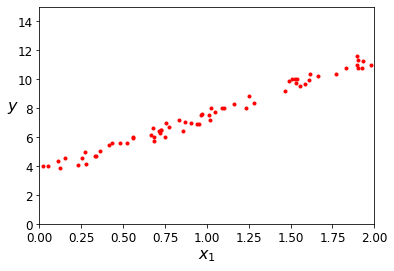

In [ ]:
plt.plot(X, y, "r.")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([0, 2, 0, 15])
plt.show()

Let's go ahead and compute an approximation for 

In [ ]:
# to use x we first add a 1 to each instance for the constant
X_b = np.c_[np.ones((100, 1)), X]
# Normal Equation:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta

array([[3.54072428],
       [3.9921132 ]])

The right answers were 3 & 4 but we got 3.6 and 3.9 which is acceptable. We can make a couple more predictions and put a line through them to have a visual sense of our predictions' accuracy:

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict

array([[ 3.54072428],
       [11.52495068]])

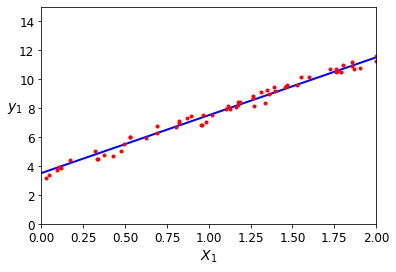

In [ ]:
plt.plot(X_new, y_predict, "b-", linewidth=2, label="Predictions")
plt.plot(X, y, "r.")
plt.xlabel("$X_1$", rotation=0, fontsize=14)
plt.ylabel("$y_1$", rotation=0, fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

You can perform linear regression with scikit-learn as well and it's quite easy. The calculations themselves differ in scikit-learn from what we have just done and that's briefly explained in pages 116-117 of the book, but here's the code:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Here are the two terms calculated approximately
lin_reg.intercept_, lin_reg.coef_

(array([3.54072428]), array([[3.9921132]]))

Same results. Now let's try to predict again:

In [ ]:
lin_reg.predict(X_new)

array([[ 3.54072428],
       [11.52495068]])

Scikit-learn's method involves using a technique called SVD which reduces the computational complexity from O^2.4-O^3 in normal equation to O^2 which is a significant difference. Although this is a big improvement, O^2 is still not very efficient but since both algorithms are linear with regard to memory complexity, they both handle big data sets with grace and an acceptable performance (plus after being trained they are pretty fast with making predictions!).

**Gradient Descent:** is the other way to train linear regression. Here's an implementation of batch gradient descent based on the formulas:

In [45]:
theta_path_bgd = []

eta = 0.1 # Learning rate
n_iterations = 1000
m = 100 # number of instances in training set

# We also need to initialize the theta to a random value
theta = np.random.rand(2, 1)

for iteration in range(n_iterations):
  gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradient

In [ ]:
theta

array([[3.54072428],
       [3.9921132 ]])

To find the ideal learning rate you can use a grid search and limit the number of itterations (beacause of time). To find the right number of itterations, one solution is to set it to something really high and then stop the process as the norm of gradient descent becomes smaller than a tiny number (almost becomming minimum).

**Stochastic Gradient Descent**: Things to remember:


*   It trains the model on a single random instance each itteration
*   It is therefore much faster
*   It is therefore more random
*   It's final product is usually good but not optimal
*   It's better at finding global minimum and getting out of local minima
*   We can use a technique called simulated annealing with wich we reduce the learning rate over time. Learning rate starts big and when we find the global min we start to reduce it. The function that determines learning rate is called learning schedule. It is crusial to reduce the learning rate at the right time and to the right amount to avoid getting stuck in local minima or never setteling for optimal minimum.

Here's the implementation of Stochastic Gradient Descent with a simple learning schedule:



In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

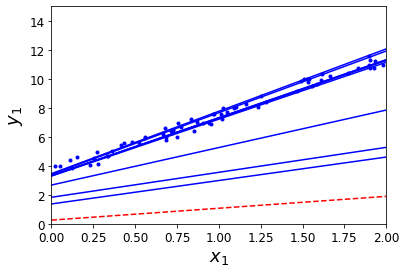

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t1 + t)

theta = np.random.randn(2, 1)  # random initialization of theta

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 10:
      # in this if look we visualize the first few lines we create. pretty cool
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y_1$", fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
theta

array([[3.59297886],
       [3.94655759]])

How to do it with scikit-learn? easy:<br>SGDRegressor class defaults to optimizing the squared error cost function until you hit the max number of itterations or the cost drops below the specified tolerance using the eta initially equal to 0.1 which changes with the default learning schedule (penalty is for regularization and we'll get back to it later):

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.57258563]), array([3.94737351]))

**Mni-batch gradient descent**: Trains on a portion of the training set in each iterations and as a result is much closer to the optimal minimum than SGC but not as good as batch GD. It also can take advantage of the hardware optimization (specially when using GPUs) that SGD just can't.<br>Here's the implementation:

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # theta random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t1 + t)

t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

Here's a comparison between SGC and BGD, visualized for each step:

In [ ]:
theta

array([[3.58579757],
       [3.928714  ]])

In [46]:
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

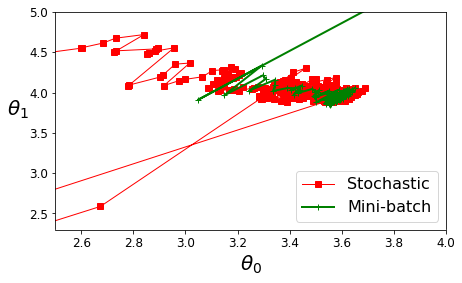

In [51]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.legend(loc="lower right", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4, 2.3, 5])
plt.show()